# Plant Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.39264122 0.34166083 0.3691118 ]
  [0.3912157  0.34023532 0.3676863 ]
  [0.4038891  0.3529087  0.38035968]
  ...
  [0.62780654 0.5768261  0.60427713]
  [0.61335695 0.5623765  0.58982754]
  [0.59784085 0.54686046 0.57431144]]

 [[0.4334217  0.3824413  0.4098923 ]
  [0.42567086 0.37469047 0.40214145]
  [0.41991022 0.36892983 0.3963808 ]
  ...
  [0.6265688  0.5755884  0.6030394 ]
  [0.6110527  0.56007224 0.5875233 ]
  [0.5964849  0.5455045  0.5729555 ]]

 [[0.4731208  0.42214042 0.4495914 ]
  [0.48296618 0.4319858  0.45943677]
  [0.47432527 0.42334485 0.45079586]
  ...
  [0.62426454 0.57328415 0.6007351 ]
  [0.60874844 0.557768   0.58521897]
  [0.5982131  0.5472327  0.57468367]]

 ...

 [[0.6955895  0.6210797  0.6289228 ]
  [0.63212484 0.557615   0.5654581 ]
  [0.56801546 0.49350563 0.50134873]
  ...
  [0.7387867  0.68388474 0.68388474]
  [0.7405148  0.68561286 0.68561286]
  [0.74259853 0.6876966  0.6876966 ]]

 [[0.7134474  0.6389376  0.6467807 ]
  [0.6165711  0.5420613  0.54990447]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.76329154 0.7162327  0.7554484 ]
  [0.75820994 0.7111511  0.7503668 ]
  [0.76732713 0.7202683  0.759484  ]
  ...
  [0.745639   0.68289393 0.7221096 ]
  [0.7412862  0.6785411  0.7177568 ]
  [0.7369333  0.6741882  0.7134039 ]]

 [[0.7647425  0.7176837  0.75689936]
  [0.756759   0.70970017 0.74891585]
  [0.7676899  0.72063106 0.75984675]
  ...
  [0.704699   0.6419539  0.68116957]
  [0.7039735  0.6412284  0.68044406]
  [0.703248   0.6405029  0.6797186 ]]

 [[0.76619345 0.7191346  0.7583503 ]
  [0.75530803 0.7082492  0.7474649 ]
  [0.76805264 0.7209938  0.7602095 ]
  ...
  [0.6848168  0.6220717  0.66128737]
  [0.6764738  0.6137287  0.6529444 ]
  [0.66813076 0.60538566 0.64460135]]

 ...

 [[0.69413817 0.6274715  0.65884405]
  [0.6952264  0.6285597  0.65993226]
  [0.6963146  0.6296479  0.66102046]
  ...
  [0.61724675 0.5270507  0.5505801 ]
  [0.61997926 0.5297831  0.55331254]
  [0.60033804 0.51014197 0.5336714 ]]

 [[0.71366554 0.6469989  0.6783714 ]
  [0.715842   0.64917535 0.6805479 ]


## Building the Model

In [10]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models

n_classes = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

base_model = DenseNet169(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

for layer in base_model.layers:
    layer.trainable = False


classification_head = models.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model = models.Sequential([
    base_model,
    classification_head
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                                 
 sequential (Sequential)     (None, 3)                 106755    
                                                                 
Total params: 12,749,635
Trainable params: 106,755
Non-trainable params: 12,642,880
_________________________________________________________________


### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
1506/32

47.0625

In [13]:
215/32

6.71875

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 40s 491ms/step - loss: 0.3200 - accuracy: 0.8778 - val_loss: 0.1724 - val_accuracy: 0.9427
Epoch 2/20
47/47 [==============================] - 21s 441ms/step - loss: 0.1193 - accuracy: 0.9639 - val_loss: 0.1067 - val_accuracy: 0.9531
Epoch 3/20
47/47 [==============================] - 18s 376ms/step - loss: 0.0769 - accuracy: 0.9753 - val_loss: 0.0873 - val_accuracy: 0.9688
Epoch 4/20
47/47 [==============================] - 19s 405ms/step - loss: 0.0636 - accuracy: 0.9820 - val_loss: 0.0553 - val_accuracy: 0.9896
Epoch 5/20
47/47 [==============================] - 20s 416ms/step - loss: 0.0515 - accuracy: 0.9886 - val_loss: 0.0662 - val_accuracy: 0.9740
Epoch 6/20
47/47 [==============================] - 19s 392ms/step - loss: 0.0398 - accuracy: 0.9900 - val_loss: 0.0655 - val_accuracy: 0.9792
Epoch 7/20
47/47 [==============================] - 18s 372ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0368 - val_accuracy: 0.9844

In [15]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 3s 369ms/step - loss: 0.0772 - accuracy: 0.9861


In [16]:
scores

[0.07718978822231293, 0.9861111044883728]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [17]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.3200259804725647,
 0.1192997395992279,
 0.07692407816648483,
 0.0636230930685997,
 0.051541268825531006]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
val_acc

[0.9427083134651184,
 0.953125,
 0.96875,
 0.9895833134651184,
 0.9739583134651184,
 0.9791666865348816,
 0.984375,
 0.984375,
 0.984375,
 0.9791666865348816,
 0.9947916865348816,
 0.9739583134651184,
 0.9947916865348816,
 0.984375,
 0.9947916865348816,
 0.9791666865348816,
 0.9791666865348816,
 0.9791666865348816,
 0.984375,
 0.9895833134651184]

In [25]:
acc

[0.8777555227279663,
 0.9639278650283813,
 0.9752839207649231,
 0.9819639325141907,
 0.9886439442634583,
 0.9899799823760986,
 0.9873079657554626,
 0.9959920048713684,
 0.997327983379364,
 0.9966599941253662,
 0.9966599941253662,
 0.9980053305625916,
 0.9966599941253662,
 0.9980053305625916,
 0.9986640214920044,
 0.9973404407501221,
 0.9979959726333618,
 0.9966599941253662,
 0.9939879775047302,
 0.9959920048713684]

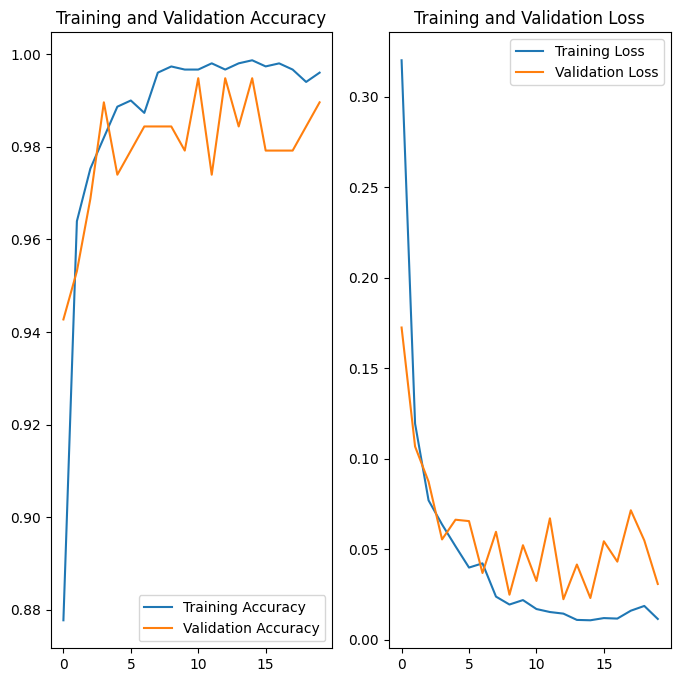

In [26]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict:


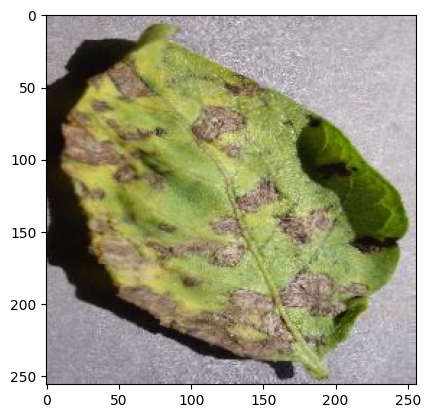

Actual label: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
Predicted label: Potato___Early_blight


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_generator, model, and class_names are defined elsewhere
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # Corrected from labels_batch to label_batch
    
    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()  # Ensure that the image is displayed
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)  # Corrected from images_batch to image_batch
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break  # Exiting after the first batch

### Write a function for inference

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 48ms/step


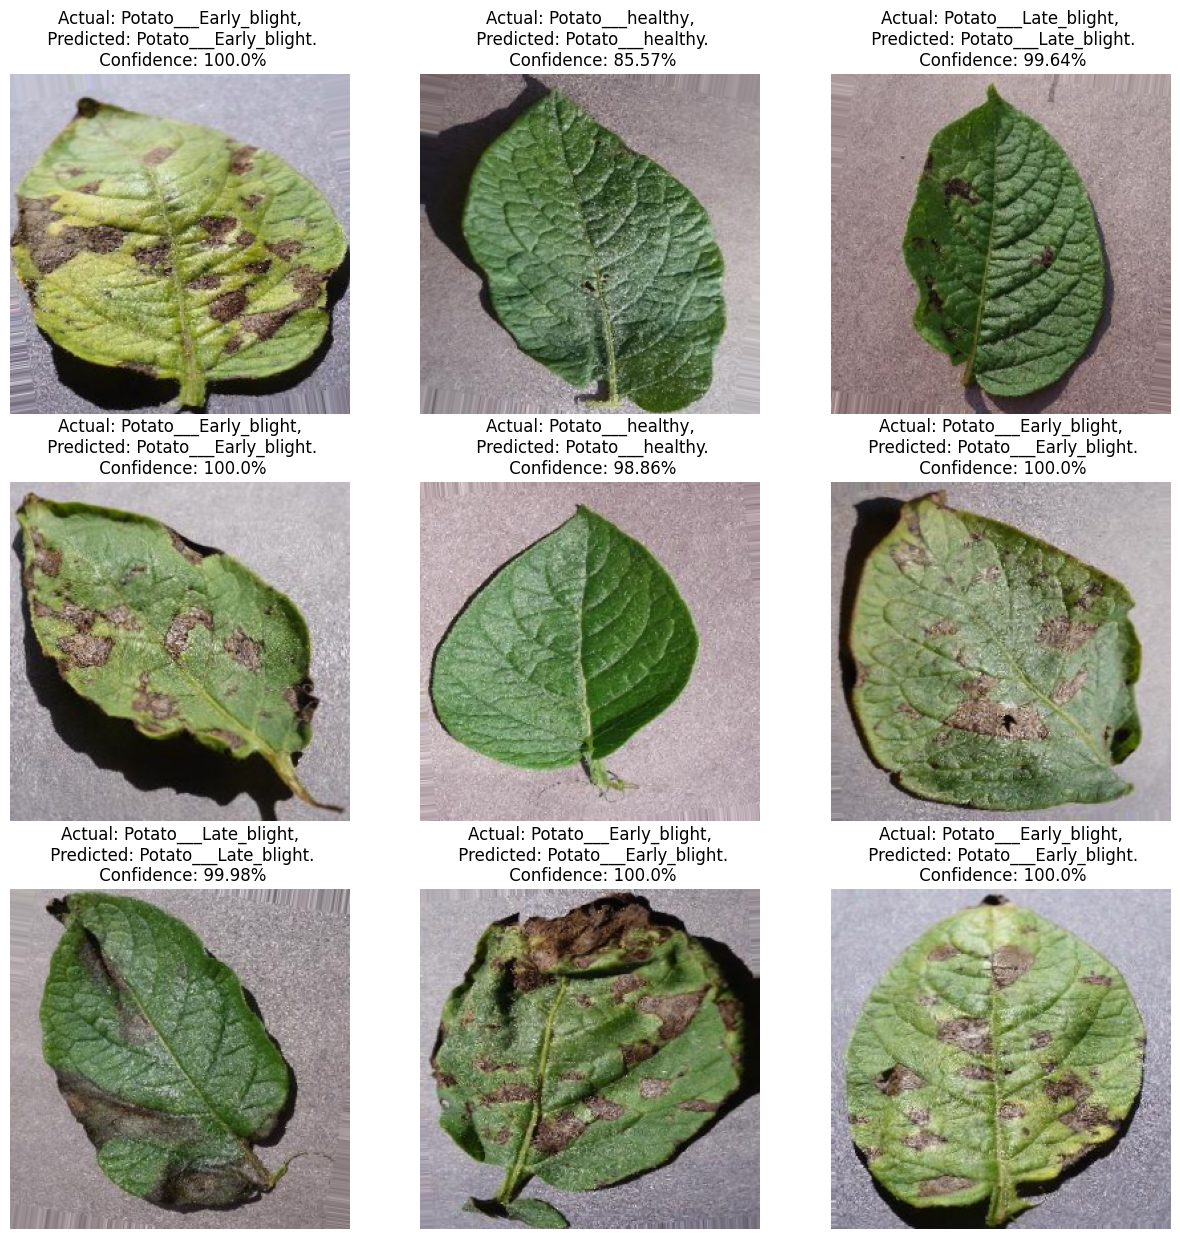

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [30]:
model.save("../potatoes.h5")